<a href="https://colab.research.google.com/github/bdipesh3045/356-Days-Of-Data-Science/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load our data set
import numpy as np
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [17]:
def cost(x,y,w,b):
  leng=x.shape[0]
  cos=0
  for i in range(leng):
    d_c=w*x[i]+b
    cos=cos+(d_c-y[i])**2
  cos=1/(2*leng)*cos
  return cos

In [5]:
# Steps to folow calculate partial derivative and avg it out
def compute_gradient(x,y,w,b):
  total_w=0
  total_b=0
  leng=x.shape[0]
  for i in range(leng):
    d_eq=w*x[i]+b
    d_w=(d_eq-y[i])*x[i]
    d_b=(d_eq-y[i])
    total_w+=d_w
    total_b+=d_b
  total_w=1/leng*(total_w)
  total_b=1/leng*(total_b)
  return total_w,total_b

In [33]:
data=[]
w_chan=[]
costy=[]
b_chan=[]
def find(x,y,steps,learn):
  b_in=0
  w_in=0
  val=1
  for i in range(steps):
    dw,db=compute_gradient(x,y,w_in,b_in)
    b_in=b_in-learn*db
    w_in=w_in-learn*dw
    if i % 100 == 0:
      w_chan.append(w_in)
      b_chan.append(b_in)
      cost_value=cost(x,y,w=w_in,b=b_in)
      data.append(val)
      val+=1
      costy.append(cost_value)
      print(cost_value)

      # print(b_in,w_in)
  return b_in,w_in



In [34]:
steps=10000
w_final,b_final=find(x=x_train,y=y_train,steps=steps,learn=0.01)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

79274.8125
86.84970508329027
11.038223294493996
9.479334741089724
8.191983243496715
7.079510310868737
6.118111466142633
5.287270767157324
4.569258392878347
3.948752235383136
3.4125109319154174
2.949091299295567
2.548604140792952
2.202503214470976
1.9034028596711572
1.6449203898549272
1.4215398885278132
1.2284945017028241
1.0616647150697145
0.9174904451438306
0.7928950684538176
0.6852197675800903
0.5921667930134331
0.5117504300645481
0.4422546244758681
0.3821963624840068
0.33029402387623996
0.28544003270810303
0.24667722205878423
0.21317840845702343
0.1842287401041018
0.15921044221131833
0.13758963392355794
0.1189049355072536
0.1027576226842888
0.08880311800919871
0.07674363771905501
0.06632183714251148
0.05731531906346955
0.049531887849966594
0.04280544807338754
0.03699246009589656
0.03196887698968801
0.027627497423315734
0.02387567802651798
0.020633356416315897
0.017831342696523346
0.01540984297200712
0.013317183369942085
0.011508707339256798
0.0099458226969803
0.008595178085934518
0.

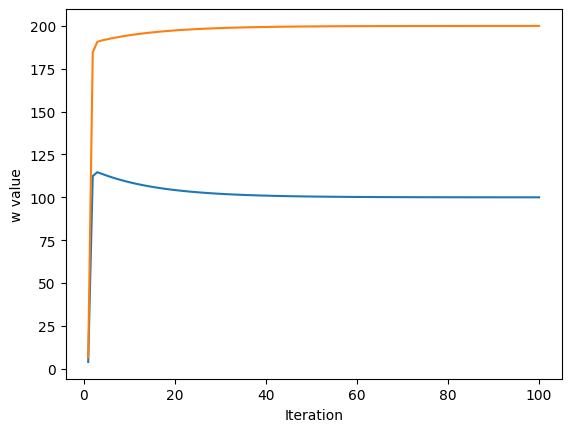

In [31]:
import matplotlib.pyplot as plt
plt.plot(data,b_chan)
plt.xlabel("Iteration")
plt.ylabel("w value")
plt.plot(data,w_chan)
plt.plot(data,w_chan)
plt.show()

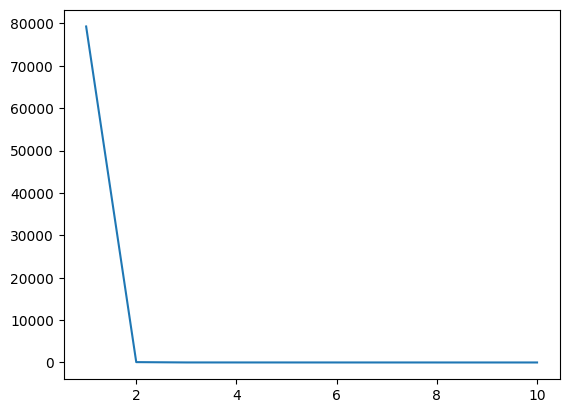

In [38]:
plt.plot(data[:10],costy[:10])